In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import cv2
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
#GPU distro -- option when running multiple models
tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
#Specify model name
NAME = "fake-vs-real-cnn-64x2"
#Specify callback object 
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

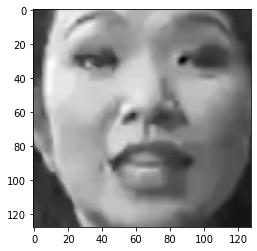

In [3]:
DATADIR = 'dataset/archive/train'
CATEGORIES = ['real_image', 'fake_image']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to fak_image and real_image dir
    #print(path)
    
    for foldername in os.listdir(path):
        folder_path = os.path.join(path, foldername) #full directory path per folder 
        #print(folder_path)
        for img in os.listdir(folder_path): #for each image in the image subfolder
            image_path = os.path.join(folder_path,img)
            #print(image_path)
            #convert image to grayscale 
            img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            break
        break
    break

In [4]:
print(img_array[2]) #2D image array b/c grayscale 
print(img_array.shape) 

[ 45  48  49  49  50  49  49  52  61  69  77  87 115 147 180 203 210 211
 209 207 207 206 205 205 210 214 215 211 202 193 184 179 169 156 143 132
 130 123 121 121 122 123 124 124 124 125 128 132 136 148 160 168 173 172
 166 162 157 157 158 158 157 156 157 158 157 159 160 162 166 172 178 182
 183 183 180 178 176 175 175 169 168 162 158 154 149 144 141 137 134 131
 123 115 111 107 104 105 104 103 103 103 103 104 107 110 118 122 121 119
 115 103  89  78  67  59  53  47  44  42  39  41  41  42  43  44  45  45
  45  45]
(128, 128)


In [5]:
#All our images are 128, 128
#IMG_SIZE = 50
#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
training_data = []

def create_training_data():
    #itterate through each folder defined in categories real_image and fake_image
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to fak_image and real_image dir

        #We have a feature (img data) as numbers
        #We need classification 'real' and 'fake' as numbers 
        #Map to numerical value 1 = real, 0 = fake
        class_num = CATEGORIES.index(category)
        #print(class_num)

        #itterate over images
        #outter loop: each folder 
        #inner loop: each image in each folder 
        for foldername in os.listdir(path):
            folder_path = os.path.join(path, foldername) #full directory path per folder 
            #print("curr folder outter loop" + folder_path)
            for img in os.listdir(folder_path): #for each image in the image subfolder
                image_path = os.path.join(folder_path,img)
                #print("curr folder innter loop" + image_path)
                #convert image to grayscale 
                #try:
                img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                #plt.imshow(img_array, cmap="gray")
                #plt.show()
                #perform resizing here if needed 
                training_data.append([img_array, class_num])
                #print(training_data)
                #print(len(training_data))
                #except Exception as e:
                #    print('error')
                #    pass
            
create_training_data()

In [16]:
DATADIR = 'dataset/archive/val'
validation_data = []

def create_validation_data():
    #itterate through each folder defined in categories real_image and fake_image
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to fak_image and real_image dir

        #We have a feature (img data) as numbers
        #We need classification 'real' and 'fake' as numbers 
        #Map to numerical value 1 = real, 0 = fake
        class_num = CATEGORIES.index(category)
        #print(class_num)

        #itterate over images
        #outter loop: each folder 
        #inner loop: each image in each folder 
        for foldername in os.listdir(path):
            folder_path = os.path.join(path, foldername) #full directory path per folder 
            #print("curr folder outter loop" + folder_path)
            for img in os.listdir(folder_path): #for each image in the image subfolder
                image_path = os.path.join(folder_path,img)
                #print("curr folder innter loop" + image_path)
                #convert image to grayscale 
                #try:
                img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                #plt.imshow(img_array, cmap="gray")
                #plt.show()
                #perform resizing here if needed 
                validation_data.append([img_array, class_num])
                #print(validation_data)
                #print(len(validation_data))
                #except Exception as e:
                #    print('error')
                #    pass
create_validation_data()

In [15]:
def read_data(directory_name, x_list):
    #itterate through each folder defined in categories real_image and fake_image
    #change dir name each (test, training, validation) set has a folder 
    DATADIR = directory_name
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to faek_image and real_image dir

        #We have a feature (img data) as numbers
        #We need classification 'real' and 'fake' as numbers 
        #Map to numerical value 1 = real, 0 = fake
        class_num = CATEGORIES.index(category)

        #itterate over images
        #outter loop: each folder 
        #inner loop: each image in each folder 
        for foldername in os.listdir(path):
            folder_path = os.path.join(path, foldername) #full directory path per folder 
            #print("curr folder outter loop" + folder_path)
            for img in os.listdir(folder_path): #for each image in the image subfolder
                image_path = os.path.join(folder_path,img)
                #convert image to grayscale 
                img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                #plt.imshow(img_array, cmap="gray")
                #plt.show()
                #perform resizing here if needed 
                x_list.append([img_array, class_num])
    return x_list


In [17]:
training_data = []
training_data = read_data('dataset/archive/train', training_data_test)

#validation_data_test = []

print(len(training_data))
print(len(validation_data))


66722
12592


In [18]:
print(len(training_data_test))
print(len(validation_data))

12592
12592


In [8]:
#shuffle data
random.shuffle(training_data)
#do not shuffle validation data to get consistant output 

In [9]:
#for sample in validation_data:
    #prints the classes in the array
    #print(sample[1])
    #prints the image data matrixies array
    #print(sample[0])
print(training_data[1])
print(len(validation_data))
print(len(training_data[0:10000]))
#resize python training_data list for smaller sample size
training_data_red = training_data[0:20000]
validation_data_red = validation_data[0:4000]
testing_data_val_subset = validation_data[551:1051]
print(len(validation_data_red))
print(len(training_data_red))
print(len(testing_data_val_subset))

[array([[27, 32, 34, ..., 27, 27, 28],
       [25, 31, 34, ..., 26, 26, 28],
       [23, 29, 33, ..., 25, 25, 28],
       ...,
       [48, 51, 53, ..., 20, 23, 27],
       [48, 51, 53, ..., 20, 24, 27],
       [48, 51, 52, ..., 21, 24, 28]], dtype=uint8), 0]
12592
10000
4000
20000
500


In [10]:
#feature set
X = []
#labels 
y = []

#Validation set 
X_val = []
#labels 
y_val = []
#(?)train_X .. test_y...
#(?)specify a validation set.. (use built in methods)

#Reduced datasets
X_r = []
y_r = []

X_val_r = []
y_val_r = []

#Testing 
X_test = []
y_test = []
print(type(X))
print(type(X_val_r))


<class 'list'>
<class 'list'>


In [11]:
for features, label in training_data:
    X.append(features)
    y.append(label)
#Cannot pass a list to a neural network
#convert X to a numpy array
#-1 is how many features do we have -- any number 
#128,128 is IMG_SIZE (shape of data)
#last param: 1 because it is a grayscale (3 if colored images)
X = np.array(X).reshape(-1, 128, 128, 1)

#Save with Val set
for features, label in validation_data:
    X_val.append(features)
    y_val.append(label)
print(len(X_val))
#Cannot pass a list to a neural network
#convert X to a numpy array
#-1 is how many features do we have -- any number 
#128,128 is IMG_SIZE (shape of data)
#last param: 1 because it is a grayscale (3 if colored images)
#X_val = np.array(X).reshape(-1, 128, 128, 1)
print(len(X_val))

#Same for Reduced Data Sets
for features, label in training_data_red:
    X_r.append(features)
    y_r.append(label)

for features, label in validation_data_red:
    X_val_r.append(features)
    y_val_r.append(label)
#Cannot pass a list to a neural network
#convert X to a numpy array
#-1 is how many features do we have -- any number 
#128,128 is IMG_SIZE (shape of data)
#last param: 1 because it is a grayscale (3 if colored images)
X_r = np.array(X_r).reshape(-1, 128, 128, 1)
X_val_r = np.array(X_val_r).reshape(-1, 128, 128, 1)
#for features, label in testing_data_val_subset:
#    X_test.append(features)
#    y_test.append(label)

#Save with Val set

print(len(X_val_r))
print(len(y_val_r))
print(len(X_r))
print(len(y_r))

12592
12592
4000
4000
20000
20000


In [12]:
#save the state of our data (our image DS formatted to grayscale)
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
#save the state of our data (our image DS formatted to grayscale)
pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

In [14]:
#read it in later
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
#feature image first image
#feature lable for first feature image 

In [15]:
#keras=>specify window size (ex: max pooling of window conv to lower order matrix)
#https://www.youtube.com/watch?v=WvoLTXIjBYU -> ML deeply explained
#Unconventinal neural network series
#Inception off of the ImageNet dataset A Deep Dream
#End CNN/RNN with a Dense/Fully-Connected Layer after Flatten layer 
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

#scale/normalize image data min 0 max 255 for pixle data
#expansion: keras.utils.normalize
#dividing my 255 normalizes pixle enteries to be between 0-1
X = X/255.0
X_r = X_r/255.0
print(type(X_r))
#X_val_r = X_val_r/255.0
#X_test = X_test/255.0

<class 'numpy.ndarray'>


In [16]:
#Model1
model = Sequential()
#init convolutional layer, 2nd param: window 3x3 (subsection of the image)
#X.shape[-1] is how many feature sets do we have 
#get input shape dynamically 

#LAYER 1
model.add(   Conv2D(64, (3,3), input_shape = X.shape[1:])   )
#activation or pooling layer after convolutional 
#rectified linear activation layer
model.add(Activation("relu"))
#choose (2,2) variable 
model.add(MaxPooling2D(pool_size=(2,2)))

#LAYER 2
#repeat but disregard input shape 
model.add( Conv2D(64, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#At this point we have a 2x64 layer Convolutional Neural Network

#LAYER 3
#For good measure, adding a final 64 node dense layer 
#Flatten data 1st b/c Conv layer is 2D but Dense layer wants a 1D data set
model.add(Flatten())
model.add(Dense(64))
#need act func relu so it is NOT a linear regression problem
model.add(Activation('relu'))

#OUTPUT LAYER
model.add(Dense(1))
#need activation function for it (not really a layer)
model.add(Activation('sigmoid'))

#could use categorical loss
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [17]:
#model2 -- working model for sophistication level of deep fake 
#sampling values from a uniform distribution of [0,1] range, we would replace the range with [-y,y]
from keras.models import Sequential
model2 = Sequential()

#LAYER 1
model2.add(   Conv2D(64, (3,3), input_shape = X.shape[1:])   )
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

#LAYER 2
#repeat but disregard input shape 
model2.add( Conv2D(64, (3,3)) )
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

#At this point we have a 2x64 layer Convolutional Neural Network
#init_scheme = initializer = tf.keras.initializers.Zeros()
#LAYER 3
model2.add(Flatten())
model2.add(Dense(64))
#need act func relu so it is NOT a linear regression problem
model2.add(Activation('relu'))

#OUTPUT LAYER - this could be 5
model2.add(Dense(5))
#need activation function for it (not really a layer)
model2.add(Activation('softmax'))

#could use categorical loss
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [18]:
#Weights initialized with values sampled from a uniform distribution with a careful tweak
# iterate over the layers of a given model
for layer in model2.layers:
   # check if the layer is of type `Dense`
   if isinstance(layer, tf.keras.layers.Dense):
       
       # shapes are important for matrix mult
       shape = (layer.weights[0].shape[0], layer.weights[0].shape[1])
       # determine the `y` value
       y = 1.0/np.sqrt(shape[0])
       
       # sample the values and assign them as weights
       rule_weights = np.random.uniform(-y, y, shape)
       layer.weights[0] = rule_weights # weights
       layer.weights[1] = 0 # bias

In [19]:
print(len(X))
print(type(X_r))

from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

66722
<class 'numpy.ndarray'>


In [20]:
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
type(X)

#y = np.array(y)
#y_val = np.array(y_val)
#type(y_val)
#X = tf.stack(X)
#y = tf.stack(y)

#X_val = tf.stack(X_val)
#y_val = tf.stack(y_val)
#type(X)

X_r = tf.stack(X_r)
y_r = tf.stack(y_r)

X_val_r = tf.stack(X_val_r)
y_val_r = tf.stack(y_val_r)




#X_test = tf.stack(X_test)
#y_test = tf.stack(y_test)

In [21]:
print(len(X))  
#print(len(y))
print(len(X_val))
print(len(y_val))
print(np.shape(X))
print(np.shape(y))
print(type(X))
#print(type(X_test))


66722
12592
12592
(66722, 128, 128, 1)
()
<class 'numpy.ndarray'>


In [22]:
model2.fit(X_r, y_r, batch_size=25, epochs=50, validation_data=(X_val_r, y_val_r), verbose=1, callbacks=[tensorboard])

Epoch 1/50
800/800 [==============================] - 195s 244ms/step - loss: 0.4926 - accuracy: 0.8150 - val_loss: 57.8000 - val_accuracy: 0.4397
Epoch 2/50
800/800 [==============================] - 193s 241ms/step - loss: 0.4684 - accuracy: 0.8158 - val_loss: 19.2543 - val_accuracy: 0.5985
Epoch 3/50
800/800 [==============================] - 191s 239ms/step - loss: 0.4533 - accuracy: 0.8167 - val_loss: 19.9625 - val_accuracy: 0.6043
Epoch 4/50
236/800 [=======>......................] - ETA: 2:06 - loss: 0.4459 - accuracy: 0.8168

KeyboardInterrupt: 

In [ ]:
model2.save('model2_00_20.h5')

In [ ]:
model.fit(X_r, y_r, batch_size=25, epochs=50, validation_data=(X_val_r, y_val_r), verbose=1, callbacks=[tensorboard])

In [ ]:
# Evaluate the model on the test data using `evaluate`
#print("Evaluate on test data")
#results = model.evaluate(X_test, y_test, batch_size=128)
#print("test loss, test acc:", results)
model.save('my_model.h5')

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictizons for 3 samples")
model.predict(X_test[:3])
#print("predictions shape:", predictions.shape)